## Hierarchical Clustering

In this notebook, we will apply hierarchical clustering to the toy data set.  This is a data set that can be found on the UCI machine learning repository.  

'data.frame':	150 obs. of  3 variables:
 $ X    : num  4.92 2.2 2.38 4.37 2.08 ...
 $ Y    : num  3.31 2.76 2.27 2.68 2.19 ...
 $ class: int  1 1 1 1 1 1 1 1 1 1 ...


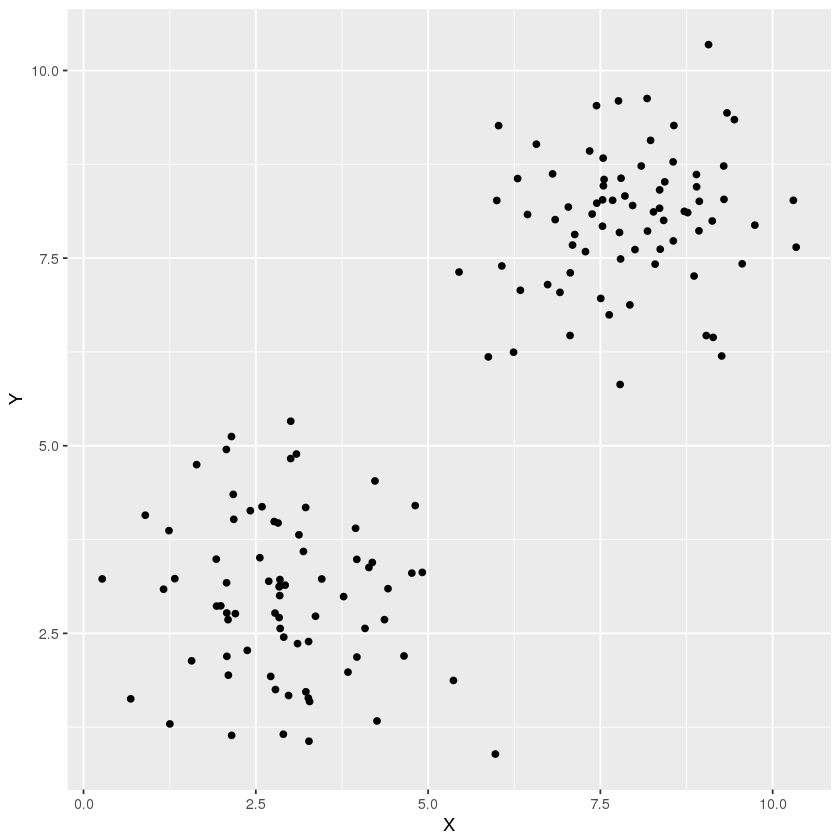

In [1]:
# read data from the file
data1 <- read.csv("../../../datasets/toydata/data1.csv",header=TRUE)

str(data1)
# Visualize the data
library(ggplot2)
pl1 <- ggplot(data1, aes(X, Y)) + geom_point(colour="black")
pl1

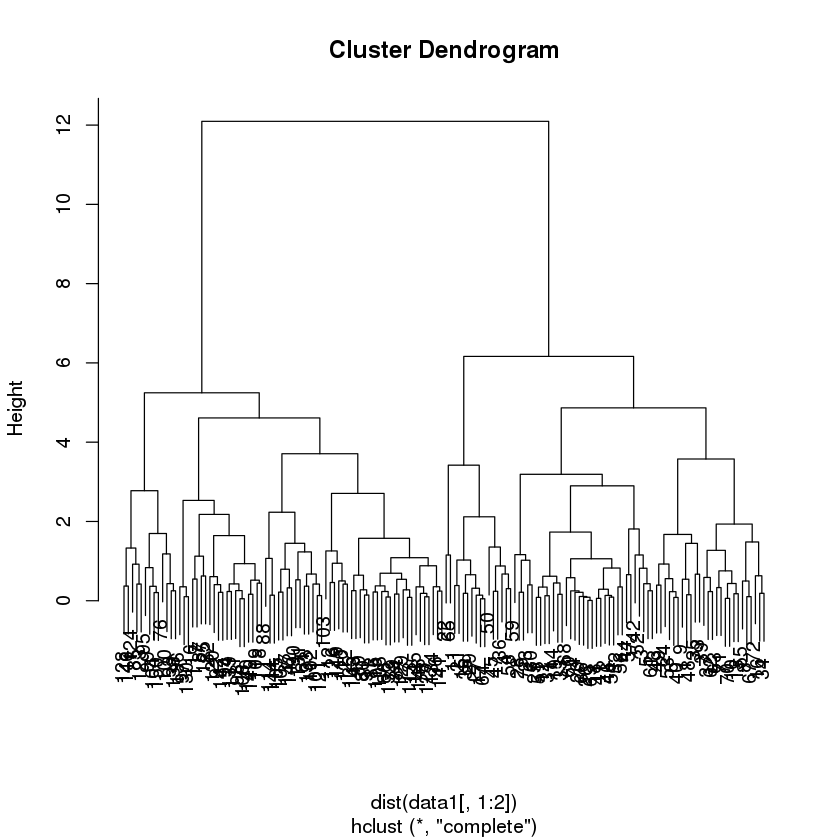

In [2]:
# Let's apply hierarchical clustering to this data set
set.seed(42)
hc_clust11 <- hclust(dist(data1[, 1:2]), method="complete")
plot(hc_clust11)

In a dendrogram, the height gives a good idea about how "far" the clusters are in terms of dissimilarity. Above, it seems like there are two clusters in this data set based on the heights of the tree branches. Let's cut it at two clusters and visualize them.

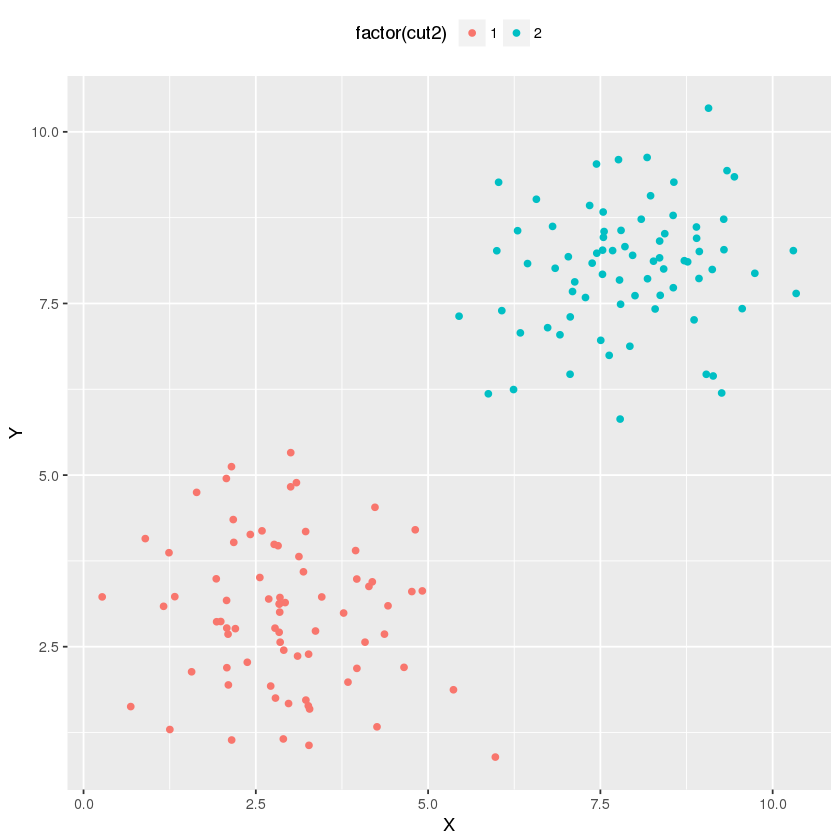

In [3]:
# now I cut the tree at two clusters; it returns labels for each point.
cut2 = cutree(hc_clust11, 2)
# use labels to visualize hclust clusters
pl1 <- ggplot(data1, aes(X, Y)) + geom_point(aes(colour=factor(cut2))) + theme(legend.position="top")
pl1

We can do the same by using *eclust* function of **factoextra** library like following:

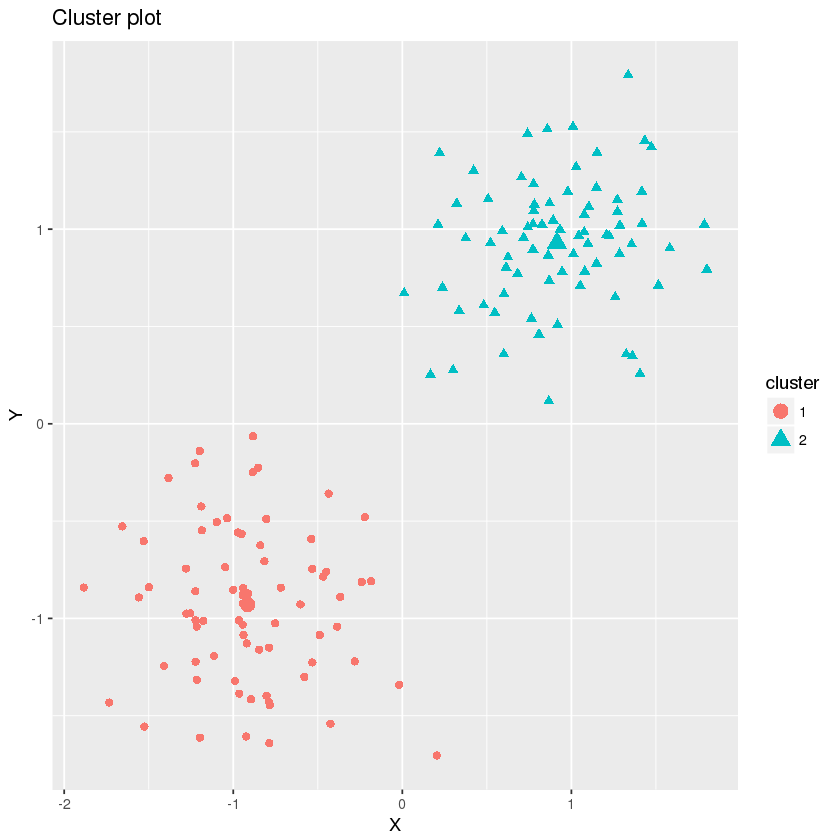

In [4]:
library(factoextra)
# run k-means on this data and visualize 
km <- eclust(data1[, 1:2], "kmeans", k=2, nstart=20, graph=FALSE)
fviz_cluster(km, geom="point", frame=FALSE)

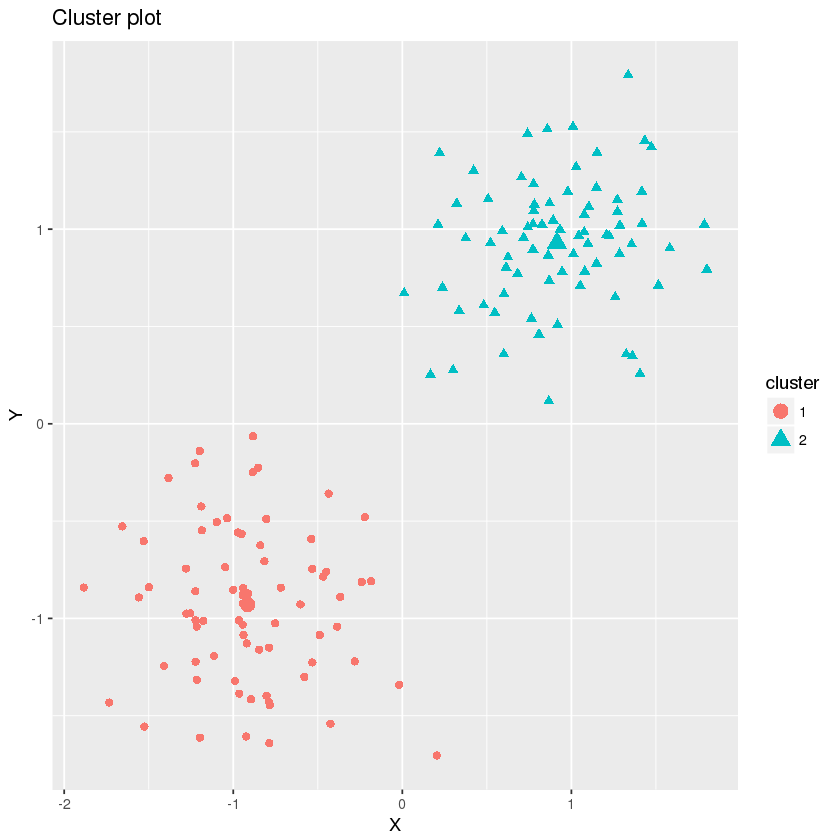

In [5]:
# run hclust on this data and visualize 
hc <- eclust(data1[, 1:2], "hclust", k=2, method="complete", graph=FALSE) 
# plot clusters
fviz_cluster(hc, geom="point", frame=FALSE)

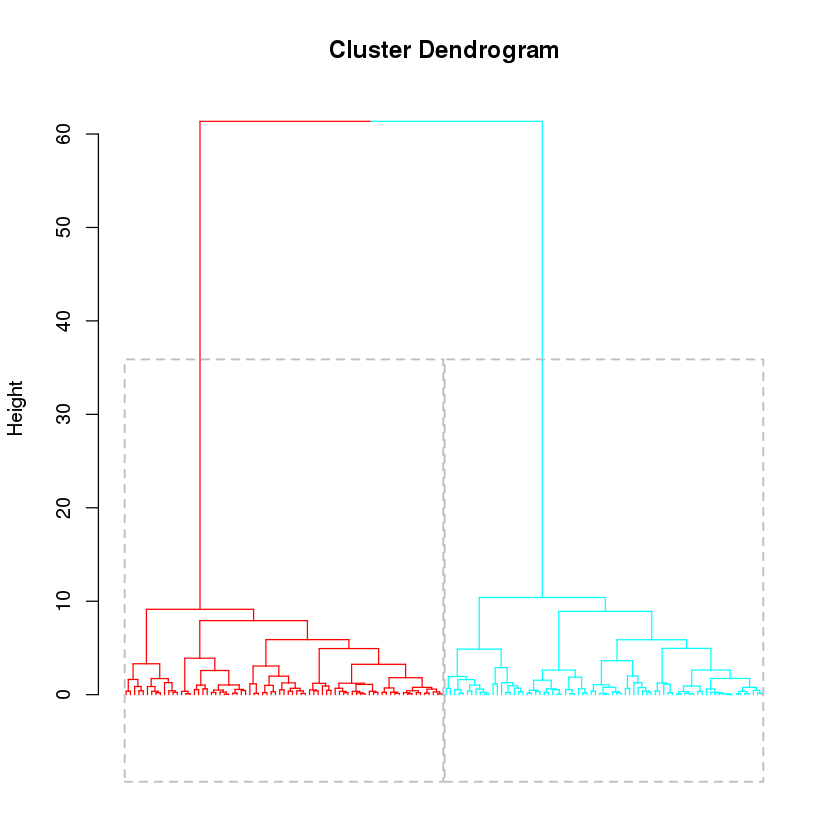

In [6]:
# also plot the dendrogram
fviz_dend(hc, rect = TRUE, show_labels = FALSE) 

In [7]:
# Let's compare the cluster assignments to the actual class labels
table(cut2, data1$class)
# or 
table(hc$cluster, data1$class)

    
cut2 -1  1
   1  0 75
   2 75  0

   
    -1  1
  1  0 75
  2 75  0

Let's see how it looks like for three clusters.

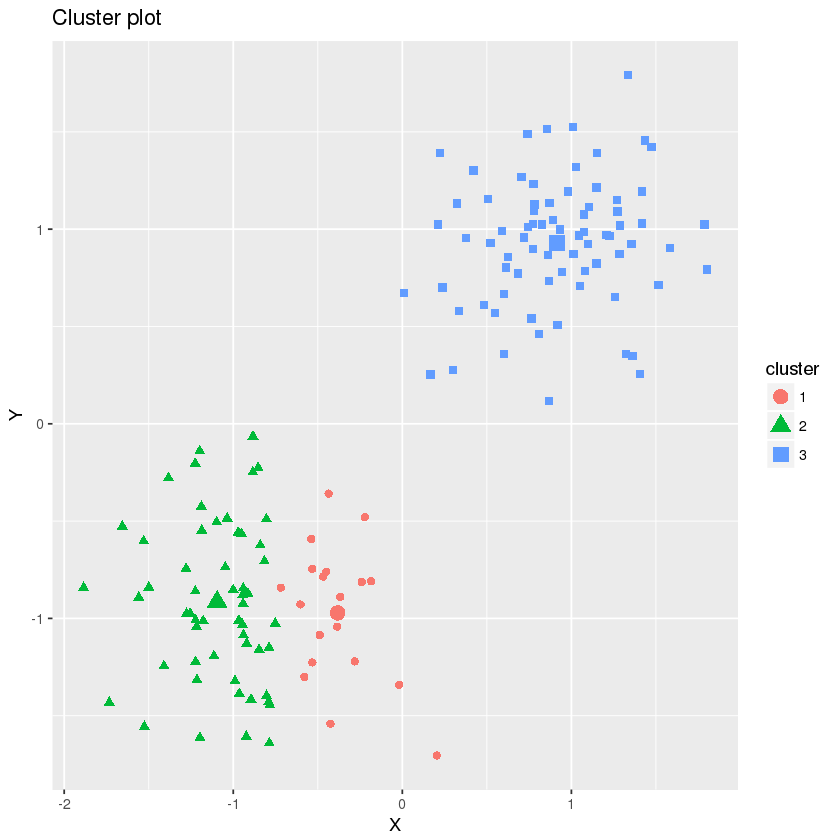

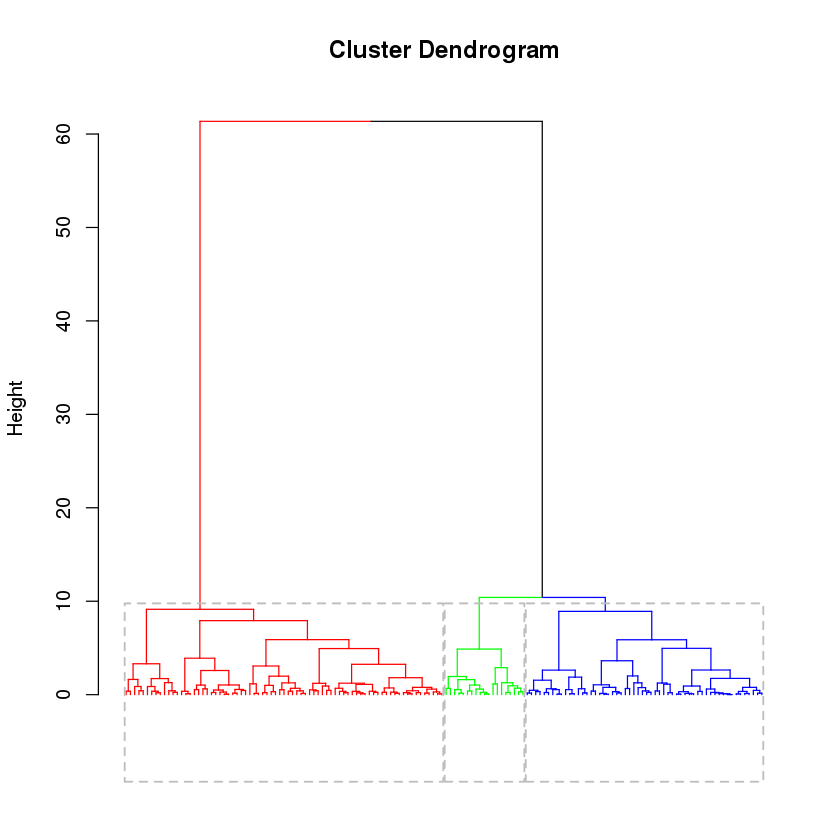

In [8]:
# run hclust on this data and visualize 
hc2 <- eclust(data1[, 1:2], "hclust", k=3, nstart=20, graph=FALSE) 
# plot clusters
fviz_cluster(hc2, geom="point", frame=FALSE)
# Dendrogram
fviz_dend(hc2, rect = TRUE, show_labels = FALSE) 

Three clusters don't make much sense as can be seen from the branch heights. Here, we can use **NbClust** just as in the to find out at what level we should cut the tree. 

Let's apply it to the second data set. 

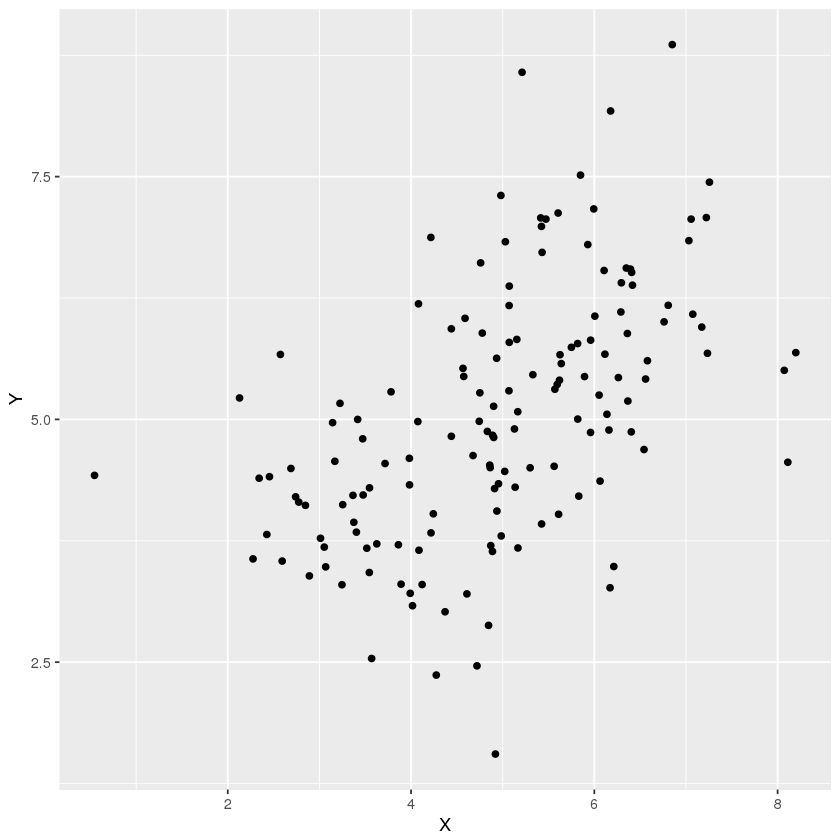

In [10]:
# read data from the file 
data2 <- read.csv("../../../datasets/toydata/data2.csv",header=TRUE)

# Visualize the data
pl2 <- ggplot(data2, aes(X, Y)) + geom_point(colour="black")
pl2


Let's start with two clusters.

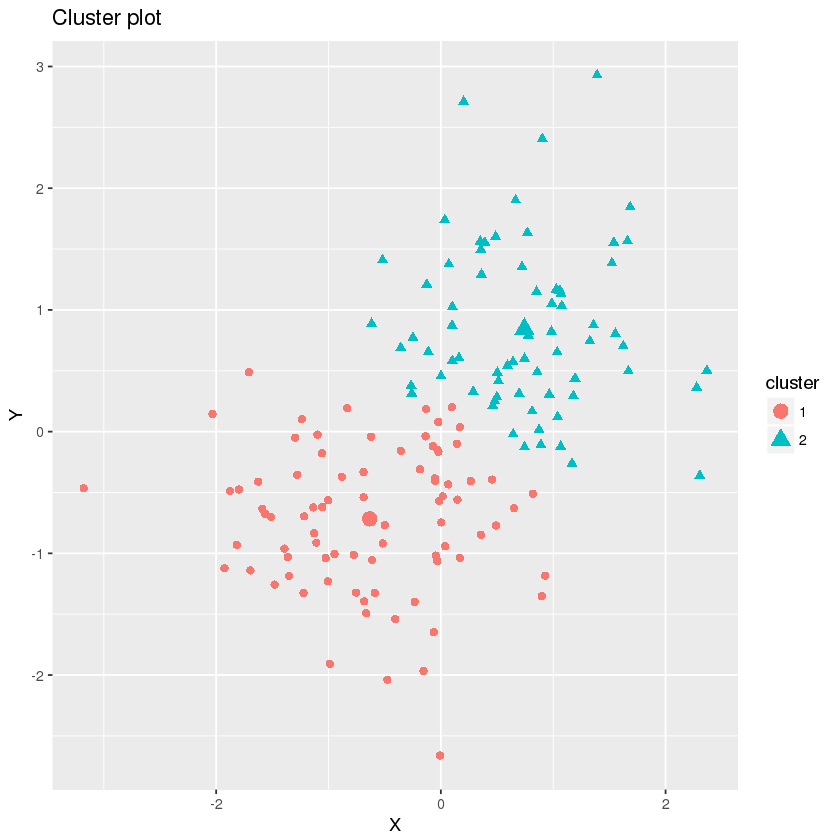

In [14]:
# run hclust on this data and visualize 
hc3 <- eclust(data2[, 1:2], "hclust", k=2, nstart=20, graph=FALSE) 
# plot clusters
fviz_cluster(hc3, geom="point", frame=FALSE)


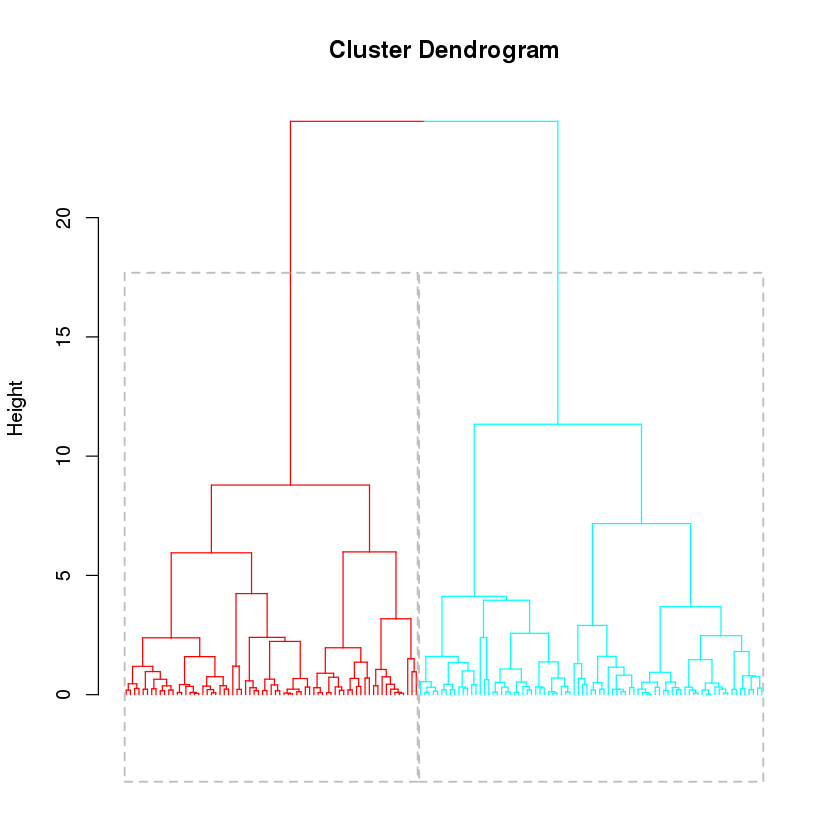

In [15]:
# Dendrogram
fviz_dend(hc3, rect = TRUE, show_labels = FALSE) 

Let's  see how well it does; compute the confusion given the actual labels. **Now it's your turn:**

In [16]:
table(hc3$cluster, data2$class)

   
    -1  1
  1 11 70
  2 64  5

Let's try the same approach for a third data set. Let's see how hclust does for those numbers.

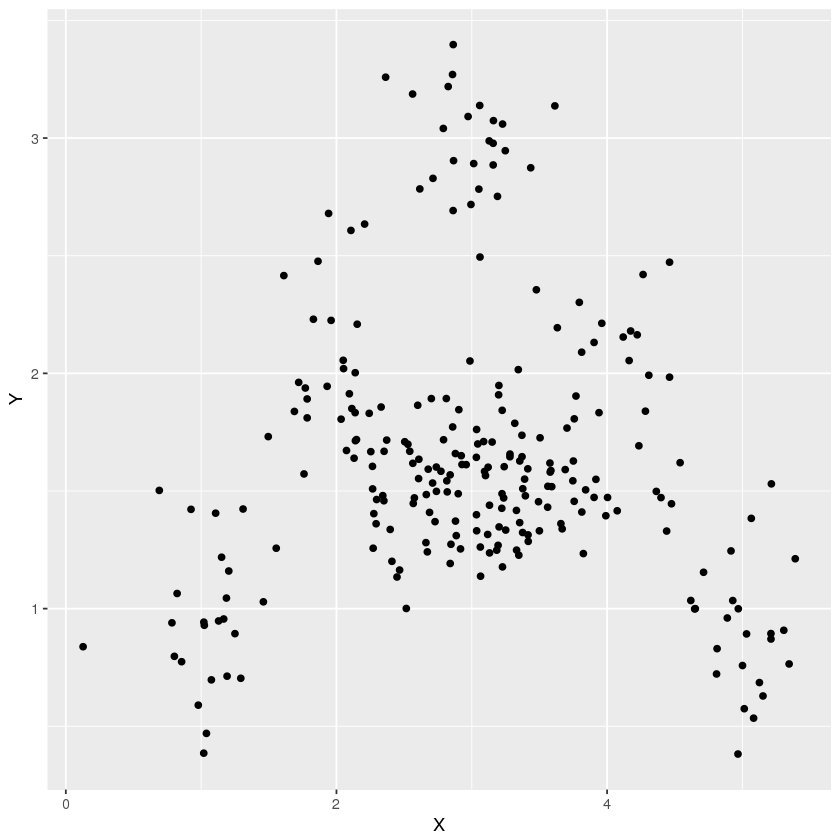

In [17]:
# read data from file
data3 <- read.csv("../../../datasets/toydata/data3.csv",header=TRUE)
pl3 <- ggplot(data3, aes(X, Y)) + geom_point(colour="black")
pl3

First, try for 3:

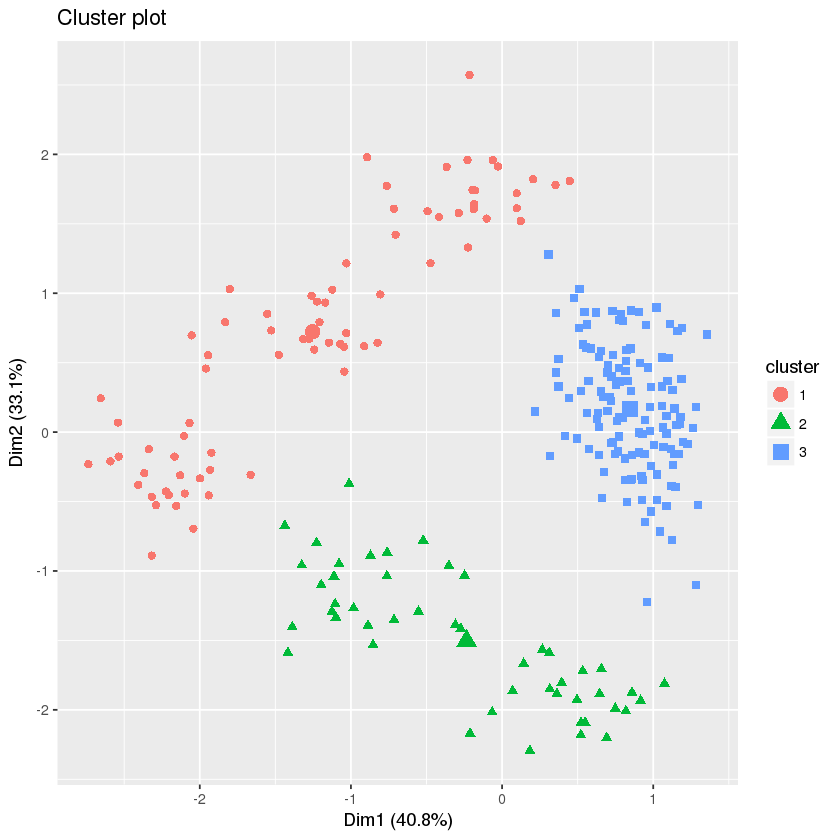

In [19]:
# run hclust on this data and visualize 
hc4 <- eclust(data3, "hclust", k = 3, method = "complete", graph = FALSE) 
# plot clusters
fviz_cluster(hc4, geom="point", frame=FALSE)


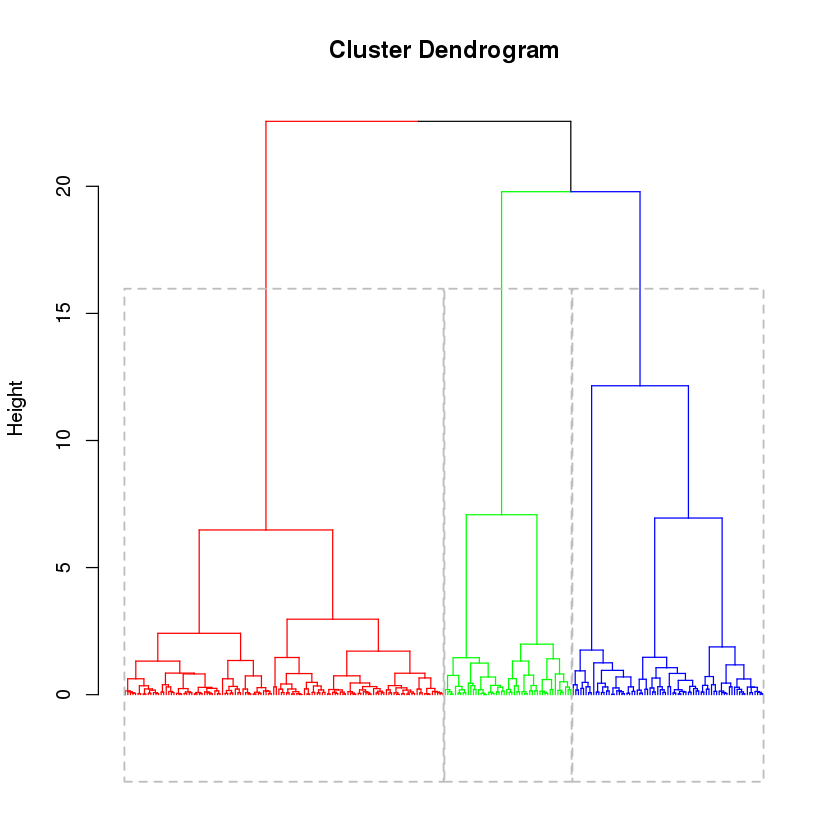

In [20]:
# Dendrogram
fviz_dend(hc4, rect = TRUE, show_labels = FALSE) 

Now, try for 6:

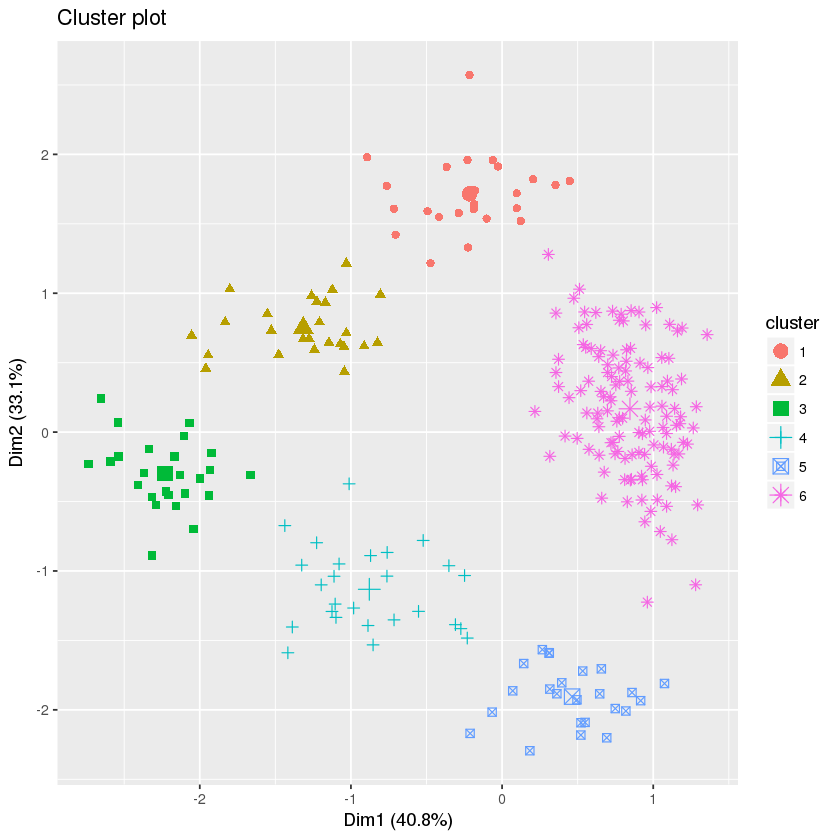

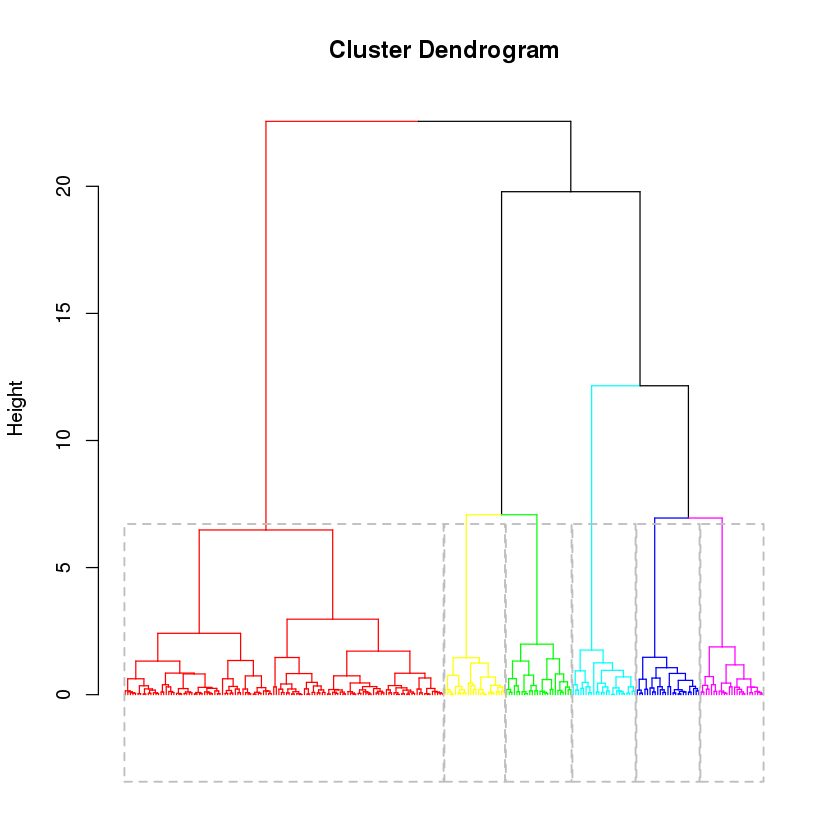

In [21]:
# run hclust on this data and visualize 
hc5 <- eclust(data3, "hclust", k = 6, method = "complete", graph = FALSE) 
# plot clusters
fviz_cluster(hc5, geom="point", frame=FALSE)
# Dendrogram
fviz_dend(hc5, rect = TRUE, show_labels = FALSE) 

Judging from the branch heights, both 3 and 6 look like reasonable numbers for number of clusters. 4 is not bad either. 